In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('final.csv')

In [3]:
#todo check correlation after dtype categorical data. do the step by step.

## delete original columns that were used to 

In [4]:
cols = list(df.columns.values)
cols

['Barragem_Nome',
 'Barragem_Altura_AcimaNivelTerreno',
 'Barragem_Capacidade',
 'Barragem_Principal_Tipo_material',
 'Barragem_Principal_comprimento',
 'Uso_principal',
 'Barragem_Categoria_Risco',
 'Barragem_Dano_Potencial_Associado',
 'TemPAE',
 'TemPlanoSeguranca',
 'TemRevisaoPeriodica',
 'CriterioVazaoProjeto_OrgaoExtravasor',
 'TemProjetoExecutivo',
 'TemProjetoComo construido',
 'TemProjetoBasico',
 'TemProjetoConceitual',
 'TemEclusa',
 'Barragem_FasedeVida',
 'ReguladaPNSB',
 'Barragem Pública ou particular',
 'Submetida à algum regulamento?',
 'material_score',
 'risco_score',
 'DPA_score',
 'temPAE_score',
 'temPS_score',
 'maintenance_score',
 'vazao_score',
 'doc_score',
 'Eclusa_score']

In [5]:
df.drop(columns=['Barragem_Nome','Barragem_Principal_Tipo_material','Uso_principal',
 'Barragem_Categoria_Risco',
 'Barragem_Dano_Potencial_Associado',
 'TemPAE',
 'TemPlanoSeguranca',
 'TemRevisaoPeriodica',
 'CriterioVazaoProjeto_OrgaoExtravasor',
 'TemProjetoExecutivo',
 'TemProjetoComo construido',
 'TemProjetoBasico',
 'TemProjetoConceitual',
 'TemEclusa'], inplace=True)

In [6]:
df.drop(columns=['ReguladaPNSB',
 'Barragem Pública ou particular',
 'Submetida à algum regulamento?'], inplace = True)

In [7]:
df.drop(columns=['Barragem_FasedeVida'], inplace = True)

In [8]:
#Eclusa is highly correlated with capacity. No need to keep it. Delete it to reduce number of features.
#df.drop(columns=['Eclusa_score'], inplace = True)

In [9]:
#PS is highly correlated with PAE. No need to keep it. Delete it to reduce number of features.
#df.drop(columns=['temPS_score'], inplace = True)

## one-hot enconding 

In [10]:
from sklearn.preprocessing import LabelBinarizer

In [11]:
#dropped this column.
'''lb = LabelBinarizer()

fit = lb.fit_transform(df['Barragem_FasedeVida'].values)
dfOneHot = pd.DataFrame(fit, columns = ['vida_'+str(int(i)) for i in range(fit.shape[1])])
final = pd.concat([df, dfOneHot], axis=1)'''

"lb = LabelBinarizer()\n\nfit = lb.fit_transform(df['Barragem_FasedeVida'].values)\ndfOneHot = pd.DataFrame(fit, columns = ['vida_'+str(int(i)) for i in range(fit.shape[1])])\nfinal = pd.concat([df, dfOneHot], axis=1)"

In [12]:
'''#drop one-hot-econding features
final.drop(columns=['Barragem_FasedeVida'], inplace=True)'''

"#drop one-hot-econding features\nfinal.drop(columns=['Barragem_FasedeVida'], inplace=True)"

In [13]:
df.columns

Index(['Barragem_Altura_AcimaNivelTerreno', 'Barragem_Capacidade',
       'Barragem_Principal_comprimento', 'material_score', 'risco_score',
       'DPA_score', 'temPAE_score', 'temPS_score', 'maintenance_score',
       'vazao_score', 'doc_score', 'Eclusa_score'],
      dtype='object')

In [14]:
df.isnull().sum()

Barragem_Altura_AcimaNivelTerreno    4482
Barragem_Capacidade                  2449
Barragem_Principal_comprimento       4550
material_score                       2953
risco_score                          4751
DPA_score                            3260
temPAE_score                         3411
temPS_score                          3352
maintenance_score                    4095
vazao_score                             0
doc_score                            5047
Eclusa_score                          564
dtype: int64

In [15]:
ds = df.dropna()

## Test one: 

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [17]:
var1 = ['DPA_score'] #'risco_score' keep as classification

scaler = MinMaxScaler(feature_range=(-2,2))

for name in var1:
    ds[name] = scaler.fit_transform(ds[name].values.reshape(-1, 1))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [18]:
var2 = ['Barragem_Altura_AcimaNivelTerreno', 'Barragem_Capacidade',
       'Barragem_Principal_comprimento']

scaler = MinMaxScaler(feature_range=(-2,2))

for name in var2:
    ds[name] = scaler.fit_transform(ds[name].values.reshape(-1, 1))
    
#dfOneHot = pd.DataFrame(fit, columns = [name+str(int(i)) for i in range(fit.shape[1])])
#mvp = pd.concat([mvp, dfOneHot], axis=1)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

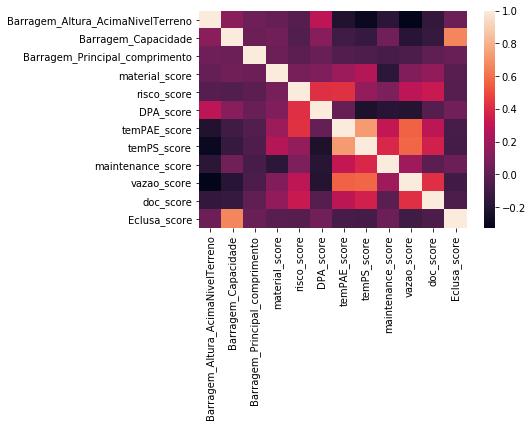

In [19]:
sns.heatmap(ds.corr()) #Eclusa and Capacty are corr. Drop eclusa and run it again.

In [20]:
y = ds['risco_score']
X = ds.drop(['risco_score'], axis = 1)

In [21]:
# divide train test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=29)

In [22]:
#NaN issue here
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

dtc.fit(X_train, y_train) #sample is random, but is not that. It starts for a different order everytime for decision tree.
y_pred = dtc.predict(X_test) #this is to see the item or the dataset and predict. For example, check behaviour for outliers. 
acc = dtc.score(X_test, y_test)*100
print(f"Decision Tree Test Accuracy for risk {round(acc, 2)}%")

Decision Tree Test Accuracy for risk 71.84%


In [23]:
#redo everything following these steps:
#https://towardsdatascience.com/machine-learning-on-categorical-variables-3b76ffe4a7cb
#obs: how to fill nans:
#test['LotFrontage'].fillna(train['LotFrontage'].mean(), inplace = True)

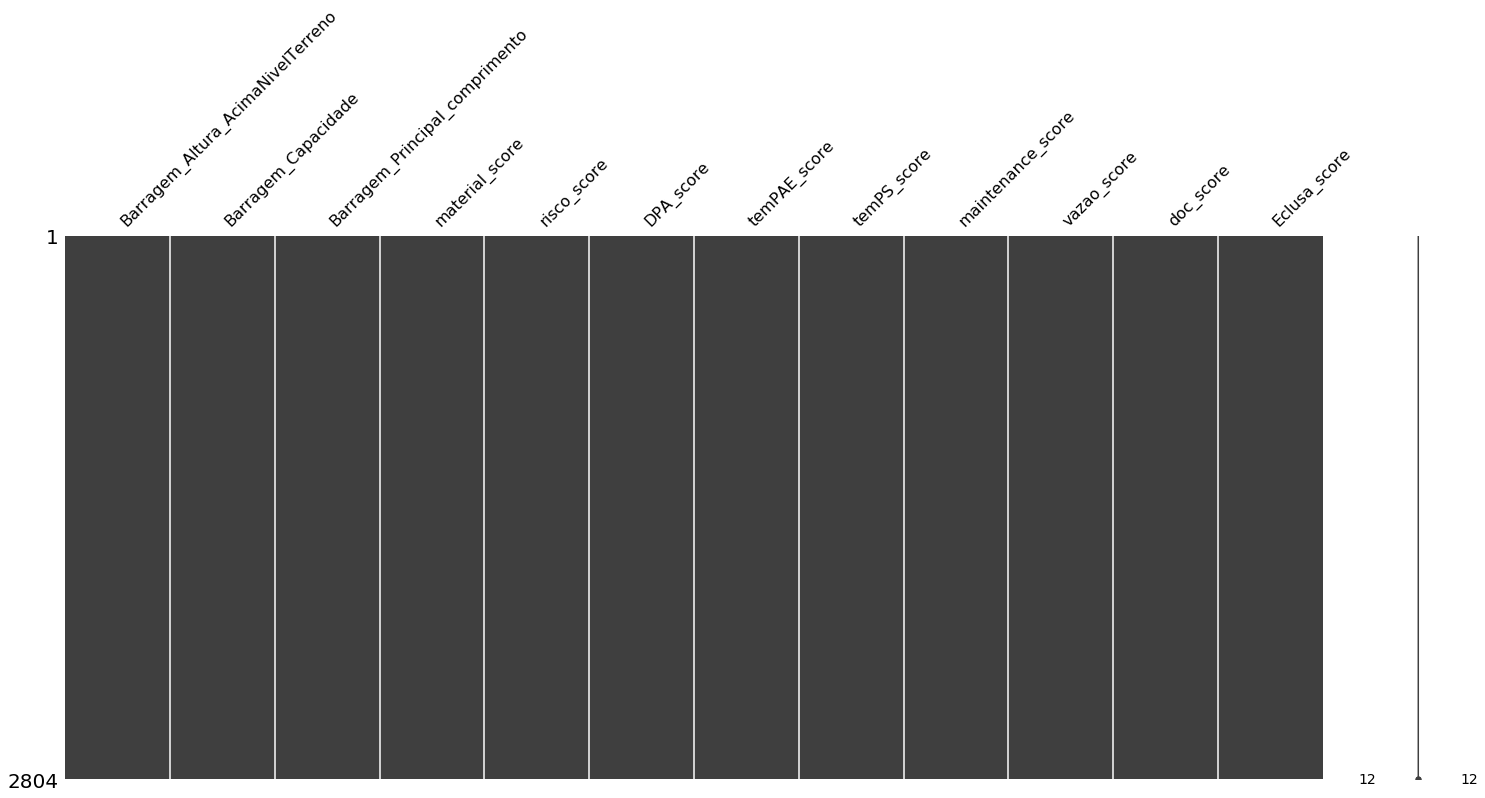

In [24]:
import missingno as msno
msno.matrix(ds)

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.model_selection import cross_val_score

models = []

models.append(("LogisticRegression",LogisticRegression()))
models.append(("SVC",SVC()))
models.append(("LinearSVC",LinearSVC()))
models.append(("KNeighbors",KNeighborsClassifier()))
models.append(("DecisionTree",DecisionTreeClassifier()))
models.append(("RandomForest",RandomForestClassifier()))
rf2 = RandomForestClassifier(n_estimators=100, criterion='gini',
                                max_depth=10, random_state=0, max_features=None)
models.append(("RandomForest2",rf2))
models.append(("MLPClassifier",MLPClassifier(solver='lbfgs', random_state=0)))

In [26]:
results = []
names = []
for name,model in models:
    result = cross_val_score(model, X_train, y_train,  cv=5)
    names.append(name)
    results.append(result)

for i in range(len(names)):
    print(names[i],round(results[i].mean(),2))

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    

LogisticRegression 0.74
SVC 0.74
LinearSVC 0.72
KNeighbors 0.77
DecisionTree 0.74
RandomForest 0.79
RandomForest2 0.8
MLPClassifier 0.77


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:470: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA, FastICA
from sklearn import datasets

# Load the data
#digits = datasets.load_digits()

# Standardize the feature matrix
features = StandardScaler().fit_transform(X)

# Create a PCA that will retain 99% of variance
pca = PCA(n_components=0.99, whiten=True)
# ica = FastICA(n_components=0.99, whiten=True)

# Conduct PCA
features_pca = pca.fit_transform(features)

# Show results
print("Original number of features:", features.shape[1])
print("Reduced number of features:", features_pca.shape[1])

Original number of features: 11
Reduced number of features: 11
